In [17]:
# using glob to get all paths of files, from all files in the sentiment_jsonl directory, draw a histogram of the sentiment scores
import json
import glob
import matplotlib.pyplot as plt
import os
from collections import defaultdict

scores_months = []
scores_days = []
scores_m_time = defaultdict(list)
scores_d_time = defaultdict(list)

# get all paths of files in the sentiment_jsonl directory
for year in os.listdir('sentiment_jsonl'):
        for month in os.listdir(os.path.join('sentiment_jsonl', year)):
            score_of_the_day = []
            for day in os.listdir(os.path.join('sentiment_jsonl', year, month)):
                open_path = os.path.join('sentiment_jsonl', year, month, day)
                for file in glob.glob(open_path):
                    with open(file, 'r') as f:
                        for line in f:
                            data = json.loads(line)
                            # get the sentiment score
                            score = data['avg_score']
                            score_of_the_day.append(score)
                            scores_days.append(score)
                            scores_d_time[f'{year}{month}{day[:-6]}'].append(score)
            # average the sentiment score of the day
            avg_score_day = sum(score_of_the_day) / len(score_of_the_day)
            scores_months.append(avg_score_day)
            scores_m_time[f'{year}{month}'].append(avg_score_day)

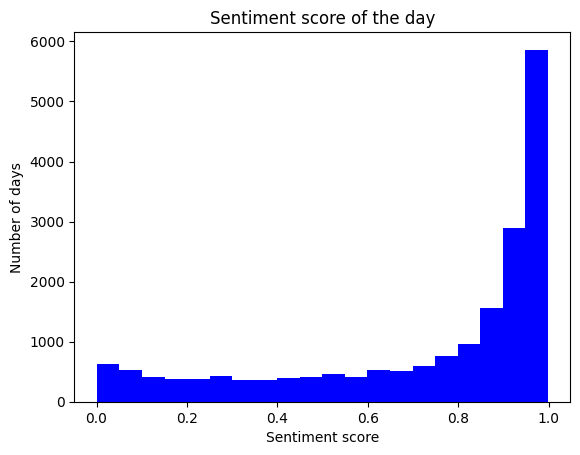

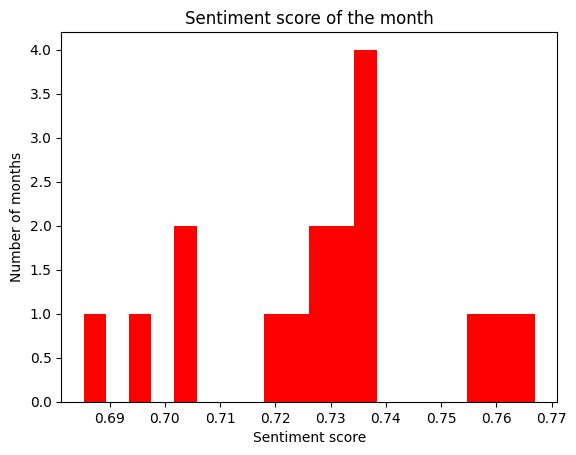

In [18]:
# two histograms, one for the sentiment score of the day and one for the sentiment score of the month
plt.hist(scores_days, bins=20, color='blue')
plt.title('Sentiment score of the day')
plt.xlabel('Sentiment score')
plt.ylabel('Number of days')
plt.show()

plt.hist(scores_months, bins=20, color='red')
plt.title('Sentiment score of the month')
plt.xlabel('Sentiment score')
plt.ylabel('Number of months')
plt.show()


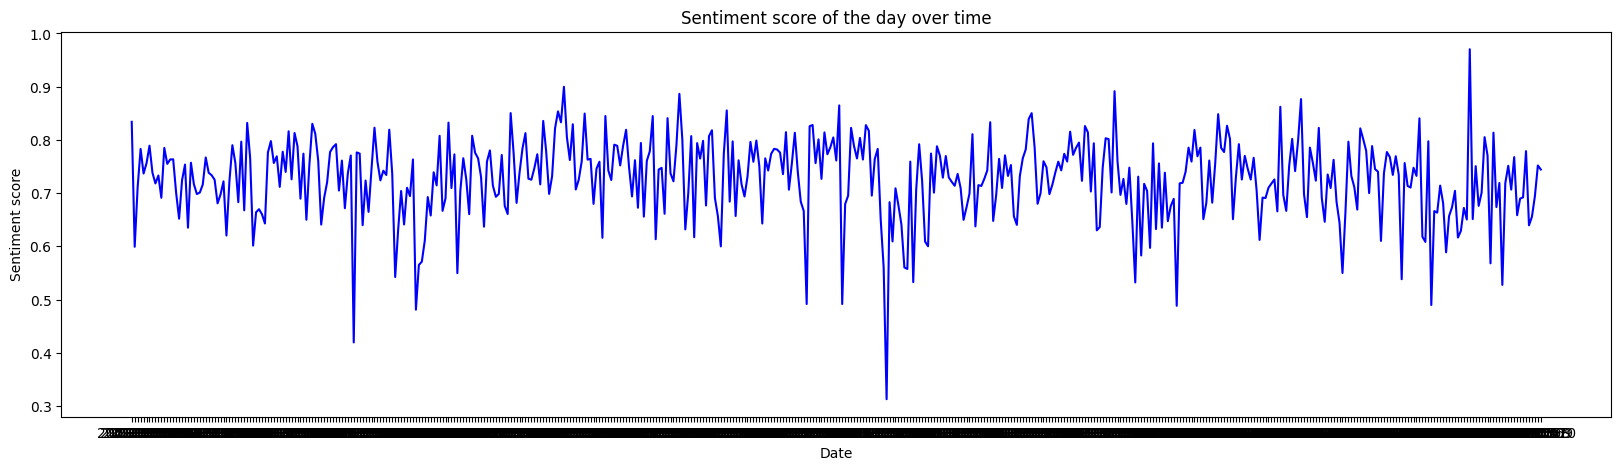

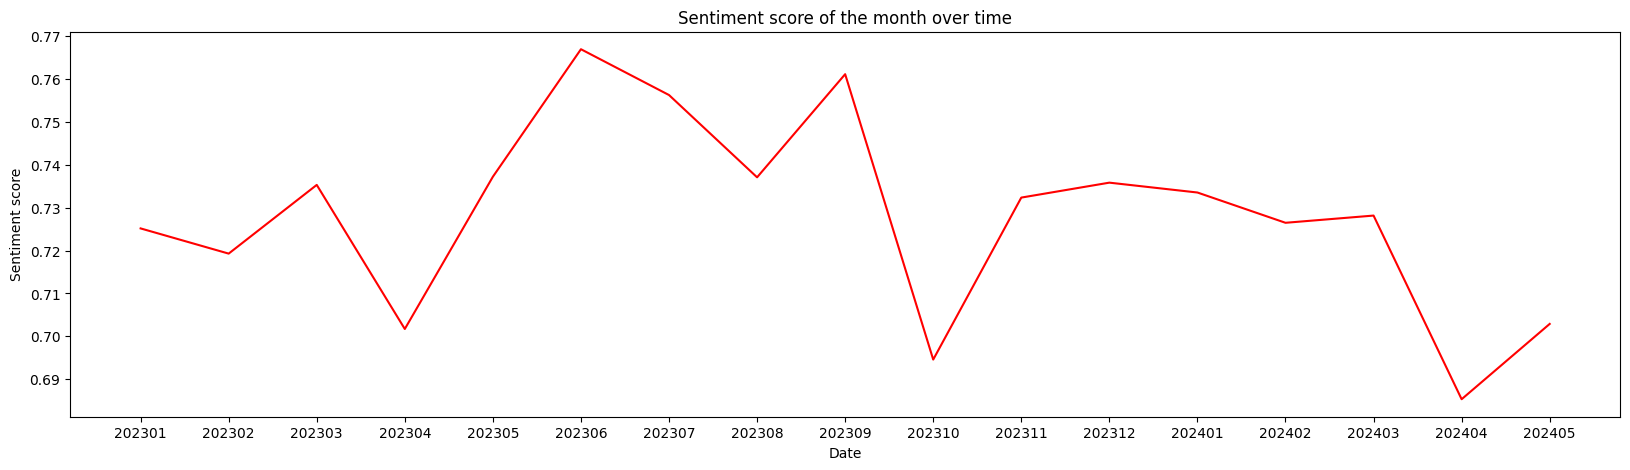

In [22]:
# plot the sentiment score of the day and month over time
plt.figure(figsize=(20, 5))
plt.plot(sorted(scores_d_time.keys()), [sum(scores_d_time[key]) / len(scores_d_time[key]) for key in sorted(scores_d_time.keys())], color='blue')
plt.title('Sentiment score of the day over time')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(sorted(scores_m_time.keys()), [sum(scores_m_time[key]) / len(scores_m_time[key]) for key in sorted(scores_m_time.keys())], color='red')
plt.title('Sentiment score of the month over time')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.show()